# This colab will be used for creation of object detection

## These code is use for Creation of the nn model.

We will train the nn model to detect between person, glasses, and phone.

---

Basic YOLO training script

Below is import library and download necessary data

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Check GPU availability and information
!nvidia-smi

Fri Sep 19 08:44:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P0             28W /   70W |     798MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Installing nevessary library

In [20]:
# Create a new directory for your project
#mkdir yolo_object_detection
#cd yolo_object_detection

# Create a virtual environment (optional but recommended)
#python -m venv yolo_env
#source yolo_env/bin/activate  # On Windows: yolo_env\Scripts\activate

# Install required packages
!pip install torch torchvision torchaudio
!pip install ultralytics  # This includes YOLOv8
!pip install opencv-python
!pip install matplotlib
!pip install numpy


Here are types of YOLO8v model that differs between each requirements

In [21]:
# Load a model (choose one)

#model = YOLO("yolov8n.pt")  # Nano version (fastest, lowest accuracy)
#model = YOLO("yolov8s.pt")  # Small version
#model = YOLO("yolov8m.pt")  # Medium version
#model = YOLO("yolov8l.pt")  # Large version
#model = YOLO("yolov8x.pt")  # XLarge version (slowest, highest accuracy)

Alasan menggunakan YOLO8v:

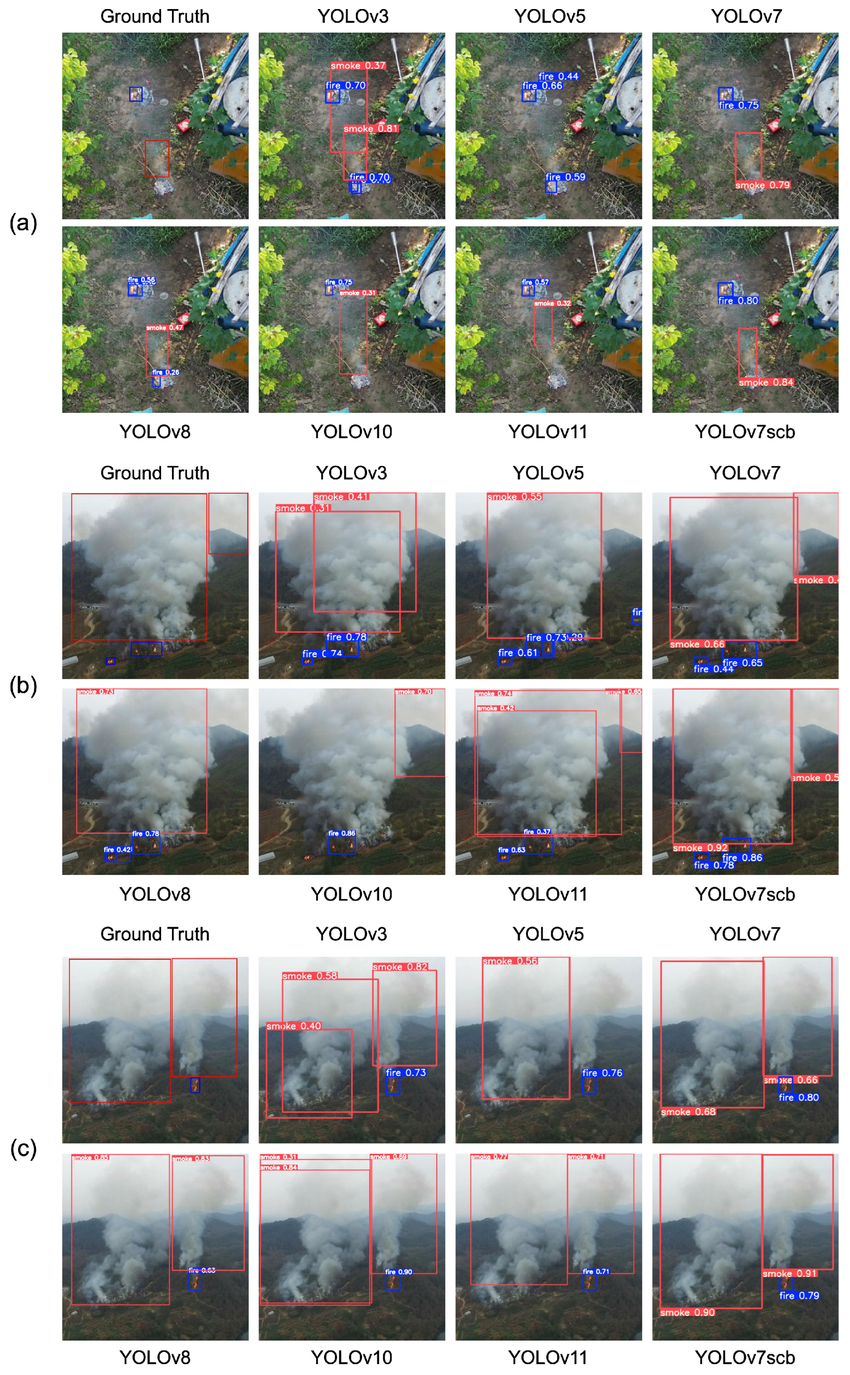

In [22]:
from IPython.display import Image


Image(filename=f"/content/drive/MyDrive/Object Detection/notes/Comparison-of-YOLOv3-YOLOv5-YOLOv7-YOLOv8-YOLOv10-YOLOv11-and-the-proposed.png", width=1000)

Load Necessary library

In [23]:
import os
import sys
import torch

# Verify installation
from ultralytics import YOLO

Load YOLO model

In [24]:
model = YOLO("yolov8n.pt")  # Nano version

In [25]:
# Train the model with custom save location

results = model.train(
    data="/content/drive/MyDrive/Object Detection/data/dataset/dataset.yaml",
    epochs=1000,
    imgsz=640,
    batch=20,
    project="/content/drive/MyDrive/Object Detection/YOLOv8_results_1",
    name="my_model_exp1",
    patience=50,
    visualize=False,  # Useful for verifying annotations
    optimizer="Adam",
    lr0=0.00001,
    pretrained=True
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=20, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Object Detection/data/dataset/dataset.yaml, degrees=0.0, deterministic=True, device=-1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=1e-05, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=my_model_exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, pat

Penjelasan mengenai variabel di atas:
1.   Path untuk lokasi konfigurasi YAML file, yang menunjukkan lokasi training / validasi gambar, label, dan nama kelas.
     ```data="/content/drive/MyDrive/Object Detection/data/dataset/dataset.yaml", ```
2.  Jumlah pengulangan atas seluruh dataset.
    ```epochs=100,```
3.   Ukuran gambar yang dimasukkan sewaktu pelatihan model(pixels).
    ```imgsz=640,```
4.  Jumlah kelompok sampel yang dimasukkan. Semakin tinggi nilai kelompok sampel, akan mengkonsumsi lebih banyak kemampuan GPU memory, namun menghasilkan hasil yang lebih stabil.
    ```batch=16,```
5. Lokasi penyimpanan. Lokasi tetap untuk menyimpan seluruh log hasil proses training.
    ```project="/content/drive/MyDrive/Object Detection/YOLOv8_results",```
6. Folder yang bertujuan untuk menyimpan seluruh hasil eksperimen ini.
    ```name="my_model_exp1",```
7. Jumlah pengulangan seluruh dataset dengan menunggu kemajuan matrix validasi sebelum menghentikan lebih awal.
    ```patience=10,```
8. Boolean untuk menampilkan pelatihan dan visualisasi hasil data yang di deteksi.
    ```visualize=False, ```
9. Algoritma optimisasi untuk memperbarui bobot probabilitas deteksi model.
    ```optimizer="Adam",```
10. Seberapa banyak model haru mengambil informasi baru dalam setiap epoch.
    ```lr0=0.0001,```
11. Boolean apakah melatih model dengan bobot prediksi model YOLO.
    ```pretrained=True```

 Resume Interrupted Training


If your Colab session disconnects (which can happen after 12 hours of inactivity for free users or 24 hours for Pro users ), you can resume training from the last checkpoint:

In [26]:
# Resume training from last checkpoint
#model = YOLO("/content/drive/MyDrive/Object Detection/YOLOv8_results/my_model_exp1/weights/last.pt")
#model.train(resume=True)

##Validation Metrics


Run validation on your test set to get quantitative performance measures:

In [27]:
# Validate the model
metrics = model.val(
    data="/content/drive/MyDrive/Object Detection/data/dataset/dataset.yaml",
    split="val",
    save_json=True,
    save_hybrid=True,
    conf=0.25,  # Confidence threshold
    iou=0.45    # IoU threshold
)

# Print metrics
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Searching for 1 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
Selected idle CUDA devices [0]
Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 101.3±5.7 MB/s, size: 227.9 KB)
val: Scanning /content/drive/MyDrive/Object Detection/data/dataset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 13.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.0it/s 2.0s
                   all         30         54      0.988      0.833      0.908      0.728
                person         30         30          1          1      0.995      0.989
               glasses         18         18      0.985      0.833      0.952      0.543
           

Penjelasan mengenai validasi model:
1. Validasi model. ```metrics = model.val(``` Lokasi yang sama sesuai dengan konfigurasi file YAML yang digunakan oleh validator dimana lokasi validasi gambar dan label. ```data="/content/drive/MyDrive/Object Detection/data/dataset/dataset.yaml",```
2. Pemilihan dataset yang dibutuhkan untuk validasi.
    ```split="val",```
3. Menyimpan hasil evaluasi (seperti precision, recall, mAP) menjadi JSON file.
    ```save_json=True,```
4. Menyimpan versi nilai asli dan prediksi dalam sebuah file. Berguna untuk analisa detail dimana model berhasil atau gagal.
    ```save_hybrid=True,```
5. Batas kepercayaan: Dimana, hanya kepercayaan dengan nilai di atas 0.25 yang di butuhkan. Ini akan menghilangkan kepercayaan rendah, maupun prediksi ambigu.
    ```conf=0.25,```
6. Batas bersinggungan dalam kesatuan: Menjelaskan batas deteksi yang terhitung 'benar'. Sebuah prediksi harus memiliki nilai bersinggungan yang lebih dari 0.45 atau lebih dari nilai asli yang terhitung True Positive.
    ```iou=0.45 )```
7. Menampilkan matrix. mAP50-95: Matriks utama untuk deteksi object, dengan singkatan mean Average Precision / Merata ratakan hasil presisi rata rata (mAP)terhitung berdasarkan batas kepercayaan dari 0.5 hingga 0.95 setiap 0.5. Inilah pengukuran atas seluruh akurasi. ``` print(f"mAP50-95: {metrics.box.map}")```
8. mAP50: Nilai akurasi prediksi model dengan batas prediksi kepercayaan 0.5. Ini adalah proses penilaian yang lebih umum dan lebih akurat dibandingkan mAP50-95. ```print(f"mAP50: {metrics.box.map50}")```

Visual Inspection of Results


Manually inspect the validation results to identify potential issues with predictions:

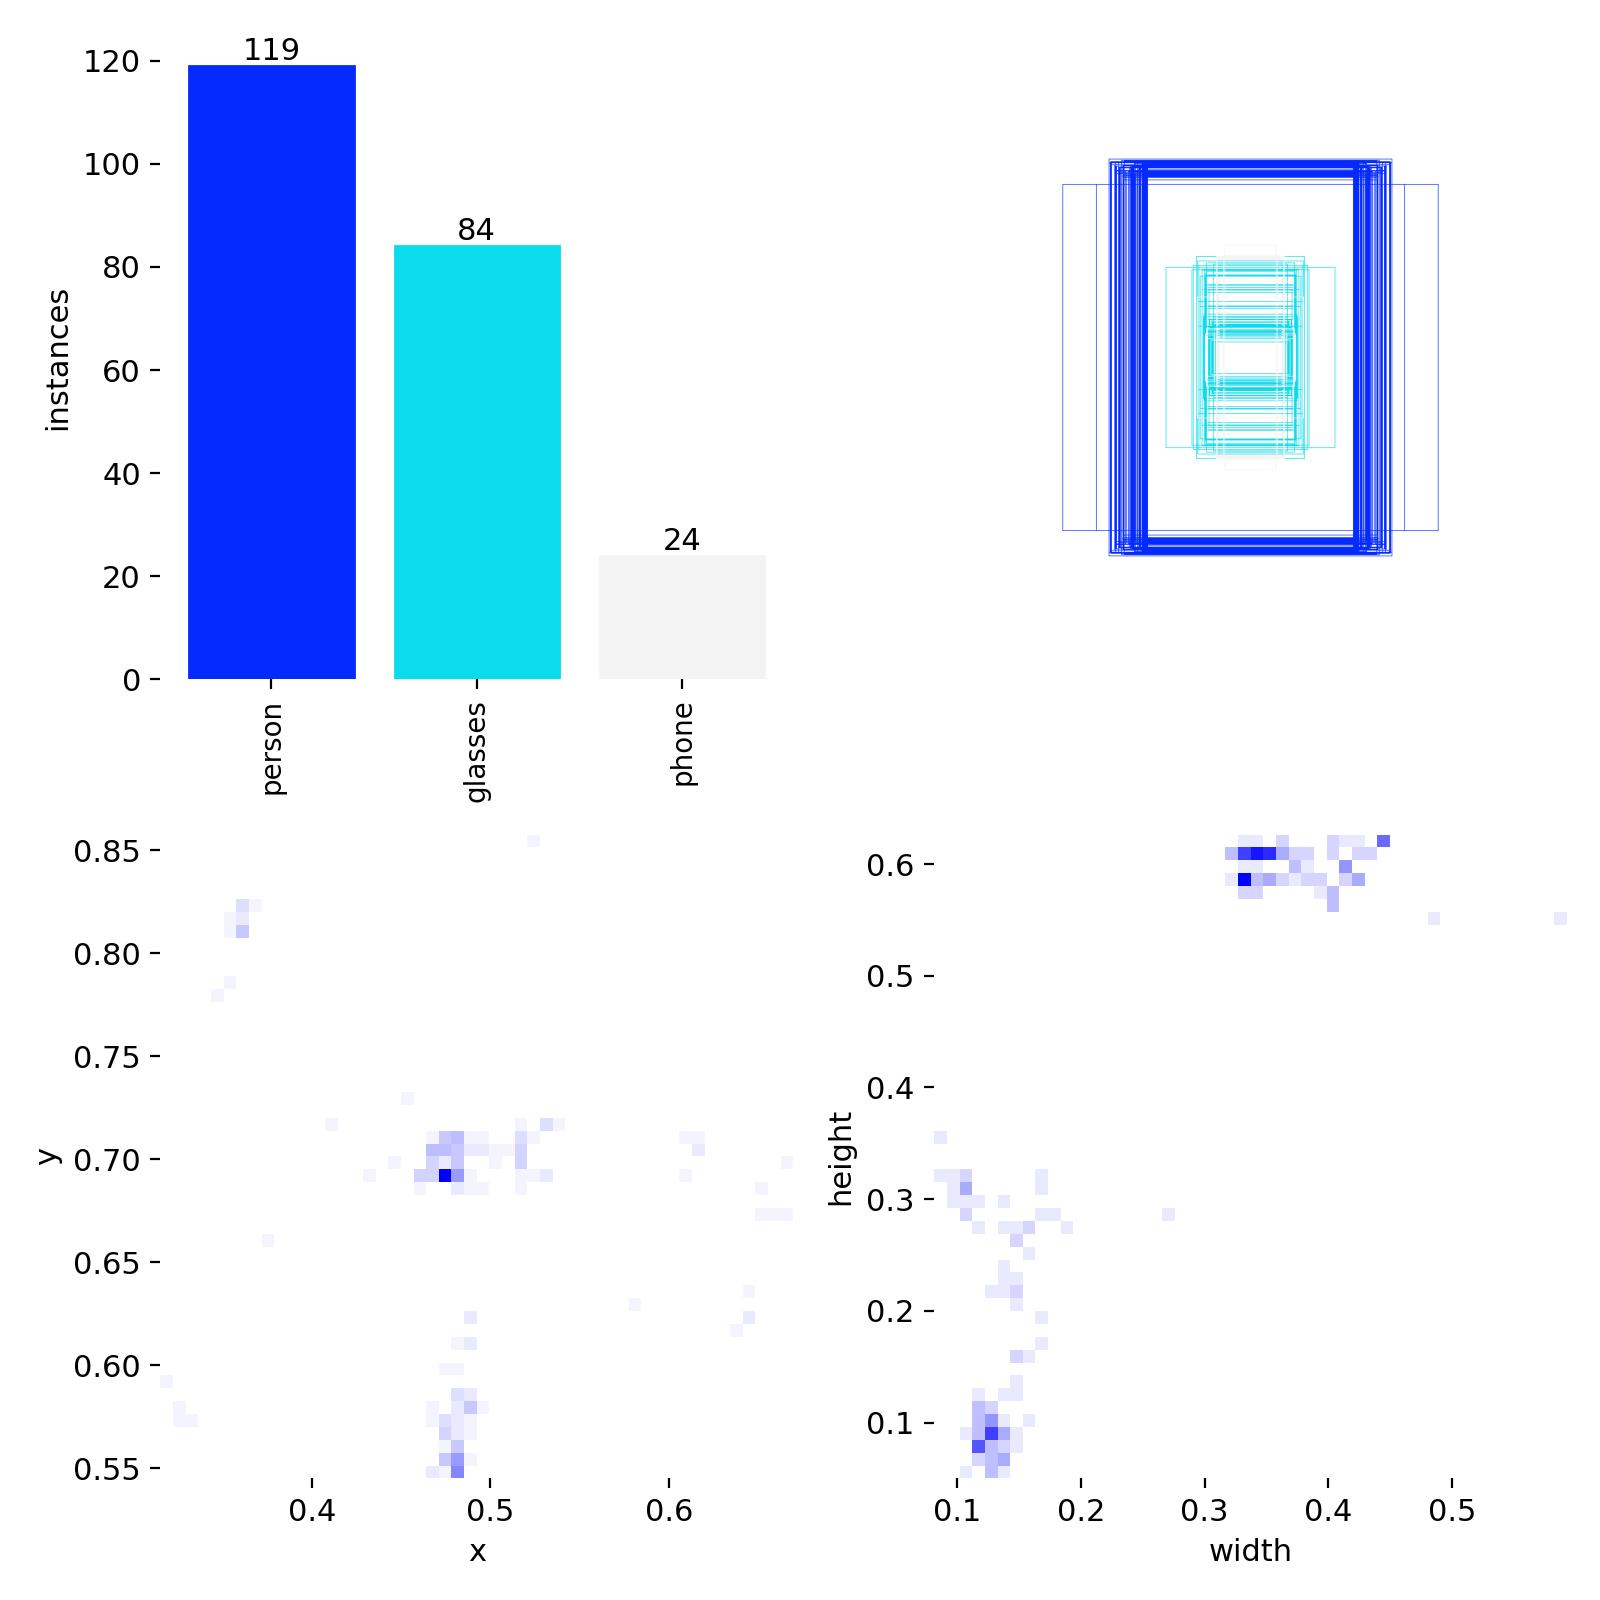

In [28]:
from IPython.display import Image

# Display validation results
Image(filename=f"/content/drive/MyDrive/Object Detection/YOLOv8_results_3/my_model_exp1/labels.jpg", width=800)

1. Top Section: Ground Truth Labels Visualization
This is the most prominent part of the image.

- Scatter Plot (Height vs. Width): The main chart with points scattered across it.

- Y-axis (Height): The height of the bounding boxes (normalized from 0 to 1).

- X-axis (Width): The width of the bounding boxes (normalized from 0 to 1).

- Each Dot: Represents a single object instance from your validation dataset.

Purpose: This plot shows the size and distribution of all objects in your dataset. A cluster of points in the center (e.g., around 0.5x0.5) means your dataset has many medium-sized objects. Points in the bottom-left are small objects, and points in the top-right are large objects.

Class Legend: The labels person - glasses - phone - are the names of the classes in your dataset. Each class is plotted with a different color. This allows you to see if certain classes tend to be a specific size (e.g., maybe "phone" objects are all clustered as small points).

2. Side Histograms: Distribution of Object Sizes
- Top Histogram (Width): Shows the distribution of bounding box widths. A tall bar at a certain value means many objects have that width.

- Right Histogram (Height): Shows the distribution of bounding box heights.

3. 3. Boxed Metrics and Counts
These are the numbers you see around the edges of the plot.

- instances: This is the total number of object instances in the validation set.
  - 84 (likely the total count)

  - 24 (could be the count for a specific class, like person, shown next to it in the actual image).

- Precision/Confidence Scale: The values 0.85 - 0.80 - ... 0.60 - are a scale for another related plot (like a Confidence Curve) that is often included in these composites. It shows how the model's precision changes as you require it to be more confident (higher confidence threshold).

7. Running Inference on New Images
Once satisfied with your model's performance, you can use it to make predictions on new images.

Perform Inference

In [29]:
# Run inference on a new image
results = model.predict(
    source="/content/drive/MyDrive/Object Detection/data/dataset/test/WIN_20250915_15_04_01_Pro.jpg",
    conf=0.25,        # Confidence threshold
    save=True,        # Save results
    save_txt=True,    # Save results as text files
    save_conf=True,   # Save confidence scores
    project="/content/drive/MyDrive/Object Detection/YOLOv8_results_1",
    name="inference_results"
)

Searching for 1 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
Selected idle CUDA devices [0]

image 1/1 /content/drive/MyDrive/Object Detection/data/dataset/test/WIN_20250915_15_04_01_Pro.jpg: 384x640 1 person, 1 glasses, 1 phone, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Object Detection/YOLOv8_results_1/inference_results
1 label saved to /content/drive/MyDrive/Object Detection/YOLOv8_results_1/inference_results/labels


Display Inference Results

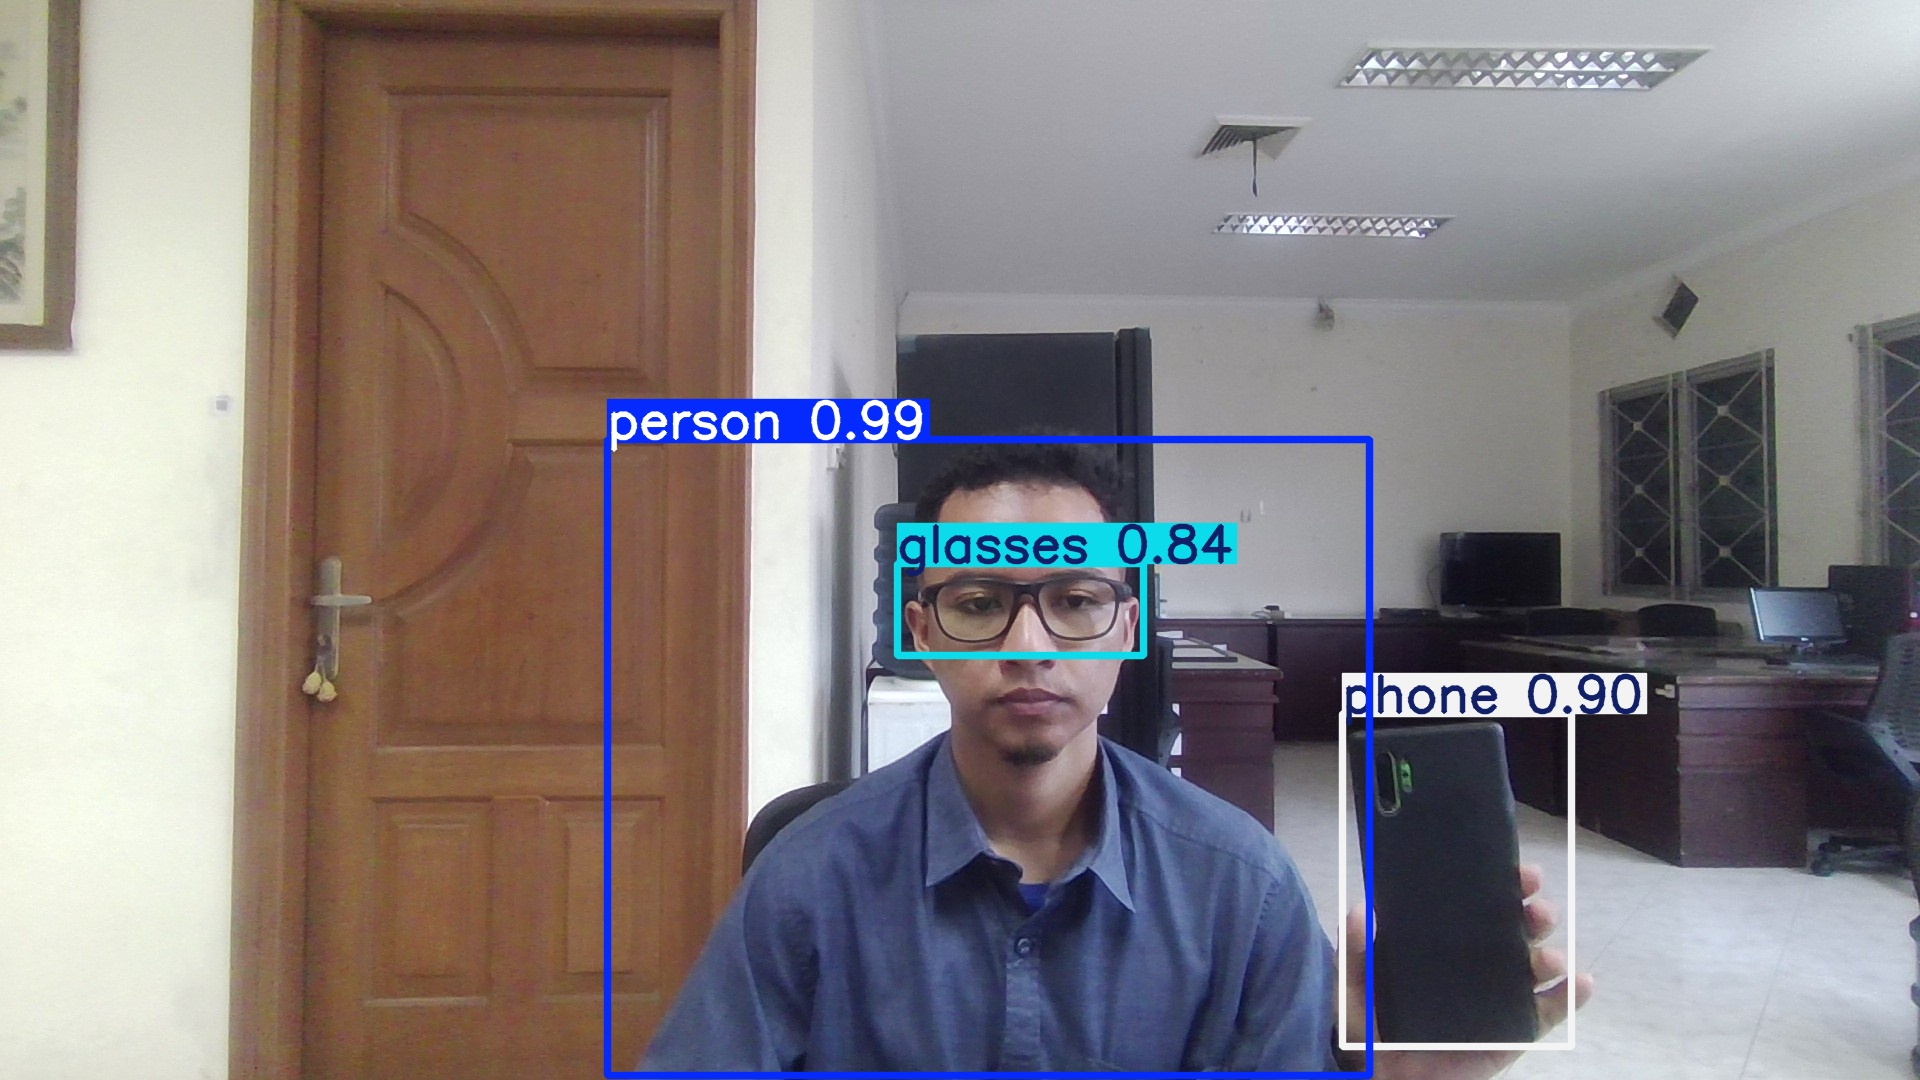

In [34]:
# Display the predicted image
from IPython.display import Image

Image(filename=f"/content/drive/MyDrive/Object Detection/YOLOv8_results_1/inference_results/WIN_20250915_15_04_01_Pro.jpg", width=600)

Export for Production


YOLOv8 supports exporting models to various formats for deployment:

In [31]:
# Export to different formats
#model.export(format="onnx")   # ONNX format
#model.export(format="tflite") # TensorFlow Lite format
#model.export(format="engine") # TensorRT format

In [32]:
model.export(format='torchscript')

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from '/content/drive/MyDrive/Object Detection/YOLOv8_results_1/my_model_exp1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

TorchScript: starting export with torch 2.8.0+cu126...
TorchScript: export success ✅ 2.0s, saved as '/content/drive/MyDrive/Object Detection/YOLOv8_results_1/my_model_exp1/weights/best.torchscript' (11.9 MB)

Export complete (2.5s)
Results saved to /content/drive/MyDrive/Object Detection/YOLOv8_results_1/my_model_exp1/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/Object Detection/YOLOv8_results_1/my_model_exp1/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/Object Detection/YOLOv8_results_1/my_model_exp1/weights/best.torchscript imgsz=640 data=/content/drive/MyDrive/Object Detection/data/dataset/dataset.yaml  
Visualize:  

'/content/drive/MyDrive/Object Detection/YOLOv8_results_1/my_model_exp1/weights/best.torchscript'

To maximize your success with YOLOv8 in Google Colab, consider these professional recommendations:


- Session Management: Colab sessions automatically disconnect after periods of inactivity (typically 90 minutes for free users) . Save your work frequently and consider using Colab Pro for longer sessions.


- Data Augmentation: Enable built-in data augmentation to improve model generalization:

In [33]:
augmentation_params = {
    "hsv_h": 0.015,  # Image HSV-Hue augmentation
    "hsv_s": 0.7,    # Image HSV-Saturation augmentation
    "hsv_v": 0.4,    # Image HSV-Value augmentation
    "rotate": 0.0,   # Image rotation (+/- deg)
    "translate": 0.1,  # Image translation (+/- fraction)
    "scale": 0.5,    # Image scale (+/- gain)
    "flipud": 0.0,   # Image flip up-down (probability)
    "fliplr": 0.5,   # Image flip left-right (probability)
    "mosaic": 1.0,   # Use mosaic augmentation (probability)
    "mixup": 0.0,    # Use mixup augmentation (probability)
}

- Hyperparameter Tuning: Experiment with different learning rates, optimizers, and augmentation strategies to improve performance.

- Regular Checkpointing: YOLOv8 automatically saves checkpoints, but ensure they're being saved to your Drive. Regularly download important model weights as an additional backup.

- Resource Management: Monitor your GPU memory usage with !nvidia-smi to avoid out-of-memory errors. Reduce batch size or image size if needed.

Common Issues and Troubleshooting
- "Yolo command not found": This typically occurs when the Ultralytics package isn't properly installed or the path isn't configured correctly. Reinstall the package and verify your system path .

- "No labels found" warning: This indicates a mismatch between image files and label files. Verify that each image has a corresponding text file with the same name and that the paths in your data.yaml are correct .

- CUDA out of memory: Reduce the batch size or image dimensions in your training configuration.

- Drive mounting issues: If unable to mount Drive, check your authentication and ensure you're using the same Google account for Colab and Drive.


By following this comprehensive guide, you'll be able to effectively create, train, and evaluate YOLOv8 object detection models entirely within Google Colab while leveraging Google Drive for persistent storage of your datasets, model weights, and results.